In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define matplotlib defaults
plt.rcParams['figure.figsize']        = 8., 6.
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 14
plt.rcParams['ytick.labelsize']       = 14
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = False
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 18

pd.set_option('display.max_columns', None)

# IMAGENET256

In [18]:
experiment_prefix = 'IMAGENET256'
# Load results
df = pd.read_csv(f'../data/{experiment_prefix.lower()}.csv')
models = df.model.unique().tolist()
print(df.shape)
df.head()

(279, 10)


,id,model,num_correct,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
0,participant_0,ADM,133.0,0.335,0.39,0.28,0.555,228.79,118.01,110.78
1,participant_1,ADM,169.0,0.155,0.13,0.18,0.475,829.29,399.16,430.13
2,participant_2,ADM,156.0,0.220,0.34,0.10,0.620,394.62,178.58,216.04
3,participant_3,ADM,169.0,0.155,0.21,0.10,0.555,164.49,82.50,81.99
4,participant_4,ADM,135.0,0.325,0.34,0.31,0.515,267.49,139.42,128.06


In [3]:
columns = df.columns.tolist()[3:]
df_results = pd.DataFrame(columns=columns)
df_results_sem = pd.DataFrame(columns=columns)
for j, model in enumerate(models):
    model_res = df.loc[df['model'] == model]
    df_results.loc[model] = model_res.mean(numeric_only=True)
    df_results_sem.loc[model] = model_res.sem(numeric_only=True) # standard error of the mean

df_results

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
ADM,0.266400,0.279200,0.253600,0.512800,368.878000,169.867200,199.010000
ADMG,0.247600,0.259200,0.236000,0.511600,395.647600,213.974400,181.674800
ADMG-ADMU,0.268800,0.298000,0.239600,0.529200,343.513200,145.187200,198.328400
BigGAN,0.158000,0.161200,0.154800,0.503200,326.384800,148.807600,177.577200
DiT-XL-2,0.286200,0.306800,0.265600,0.520600,340.988000,160.790400,180.198400
DiT-XL-2-guided,0.329630,0.330000,0.329259,0.500370,351.765926,162.170741,189.595926
GigaGAN,0.212400,0.212400,0.212400,0.500000,397.633600,203.250000,194.384400
LDM,0.308846,0.323462,0.294231,0.514615,368.827308,182.607308,186.220000
Mask-GIT,0.183400,0.203200,0.163600,0.519800,278.182000,131.692800,146.489600
RQ-Transformer,0.223462,0.241923,0.205000,0.518462,307.736923,149.075769,158.661538


In [4]:
df_results_sem

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
ADM,0.015736,0.018027,0.020534,0.011210,58.564823,27.321097,31.774851
ADMG,0.011669,0.016268,0.021299,0.014932,42.468812,36.808022,13.478704
ADMG-ADMU,0.015632,0.024021,0.017102,0.013798,46.005087,12.328108,35.568064
BigGAN,0.014248,0.018941,0.016453,0.010571,36.029311,16.488492,19.991525
DiT-XL-2,0.016117,0.023810,0.026211,0.019162,30.098281,13.332655,17.206796
DiT-XL-2-guided,0.012995,0.017312,0.019148,0.012818,27.211530,12.118164,15.367632
GigaGAN,0.014549,0.014802,0.018604,0.008421,79.410486,48.689082,32.089859
LDM,0.016858,0.021986,0.022906,0.014827,70.667569,37.226903,34.288659
Mask-GIT,0.015641,0.025204,0.018347,0.015534,25.981016,11.664100,14.595786
RQ-Transformer,0.011694,0.016953,0.013904,0.010178,27.622684,13.813008,15.076641


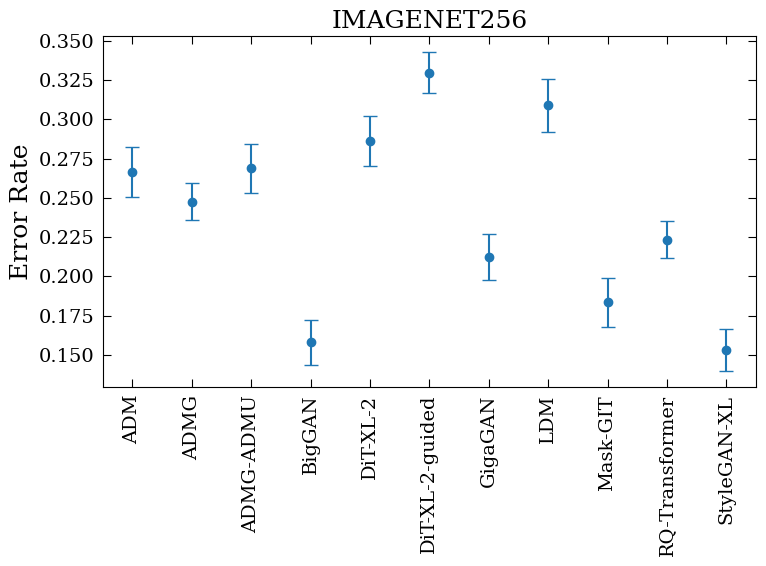

In [5]:
plt.errorbar(df_results.index, df_results.err_rt, yerr=df_results_sem.err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate")
plt.xticks(rotation=90)
plt.title(experiment_prefix.upper())
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

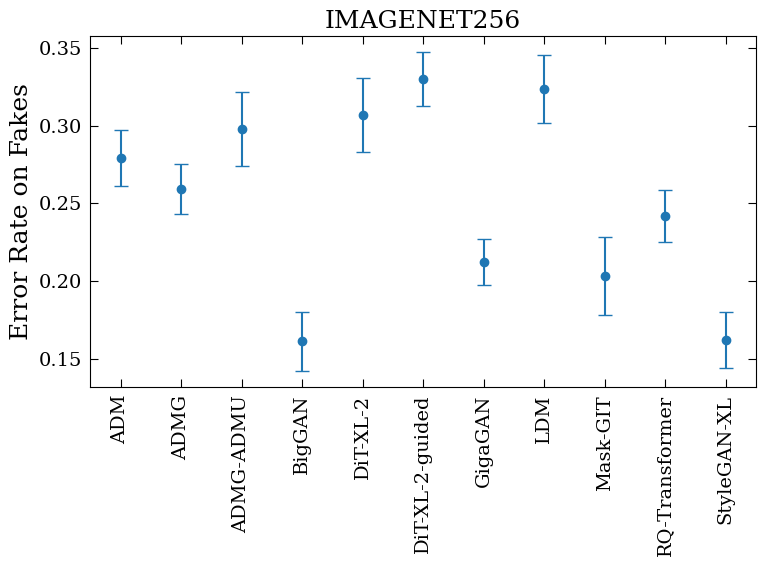

In [6]:
plt.errorbar(df_results.index, df_results.f_err_rt, yerr=df_results_sem.f_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Fakes")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_f_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

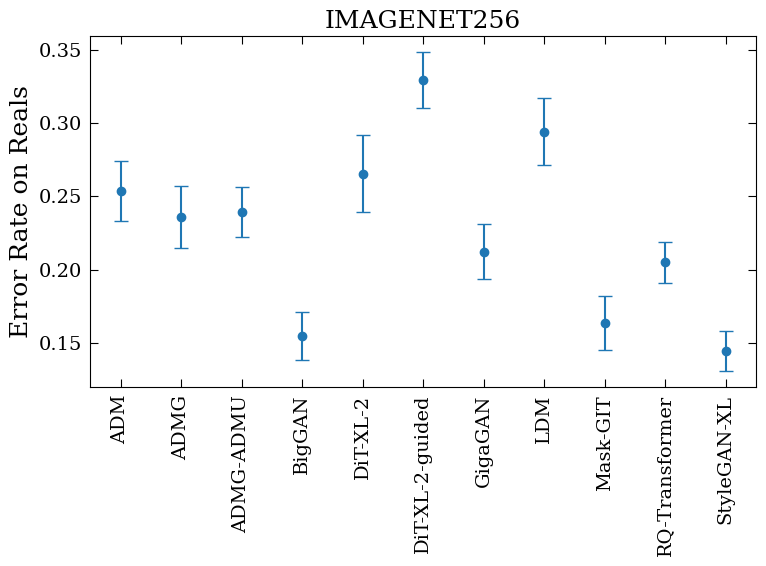

In [7]:
plt.errorbar(df_results.index, df_results.r_err_rt, yerr=df_results_sem.r_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Reals")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_r_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()